In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../model_parallel_current/030823_customprotBERT_parallel_loss_PPL_train.tsv", sep='\t')

In [18]:
df.loc[165229:, 'epochs'] = 2

In [22]:
df.to_csv('../model_parallel_current/030823_customprotBERT_parallel_loss_PPL_train_fixed.tsv', sep='\t', index=False)

In [23]:
def func(row):
    row['step']= (row['epochs'])*(82501+1)+ row['batch']+1
    return row

new_df = df.apply(func, axis=1)

In [24]:
new_df

,epochs,batch,loss/train,PPL/train,step
0,0.0,0.0,3.407069,30.176675,1.0
1,0.0,1.0,3.401563,30.010960,2.0
2,0.0,2.0,3.396845,29.869714,3.0
3,0.0,3.0,3.389234,29.643230,4.0
4,0.0,4.0,3.385791,29.541363,5.0
...,...,...,...,...,...
231103,2.0,65874.0,0.002115,1.002117,230879.0
231104,2.0,65875.0,0.000871,1.000872,230880.0
231105,2.0,65876.0,0.002999,1.003004,230881.0
231106,2.0,65877.0,0.000494,1.000494,230882.0


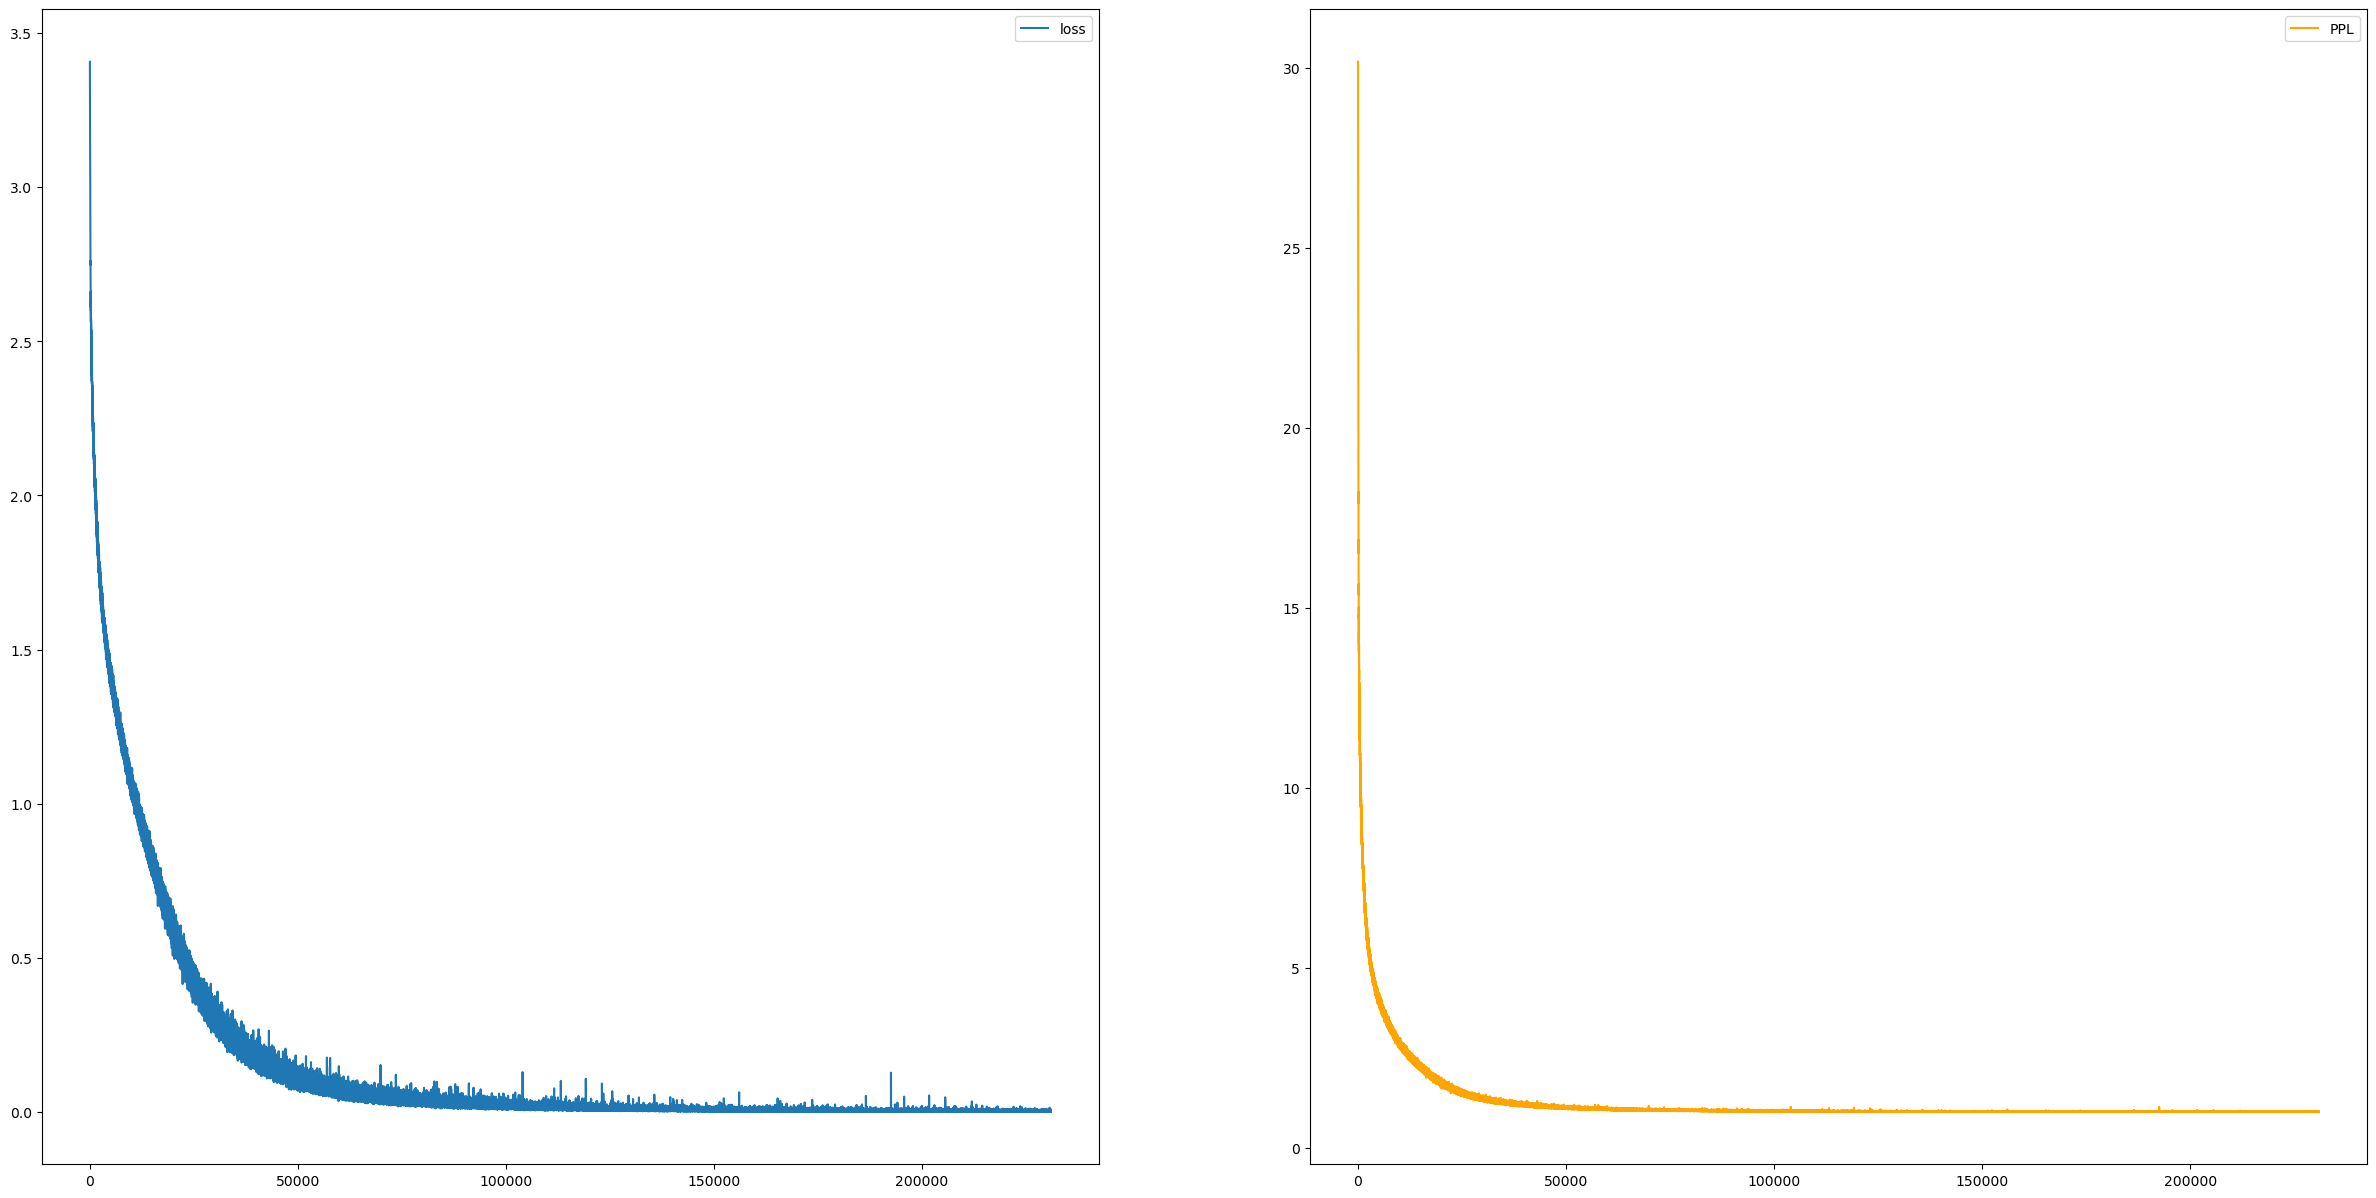

In [25]:
figure, axis = plt.subplots(1, 2, figsize=(30,15))
axis[0].plot( new_df['step'], new_df['loss/train'], label ='loss')
axis[0].legend()
axis[1].plot(new_df['step'], new_df['PPL/train'],label='PPL', color='orange')
axis[1].legend()

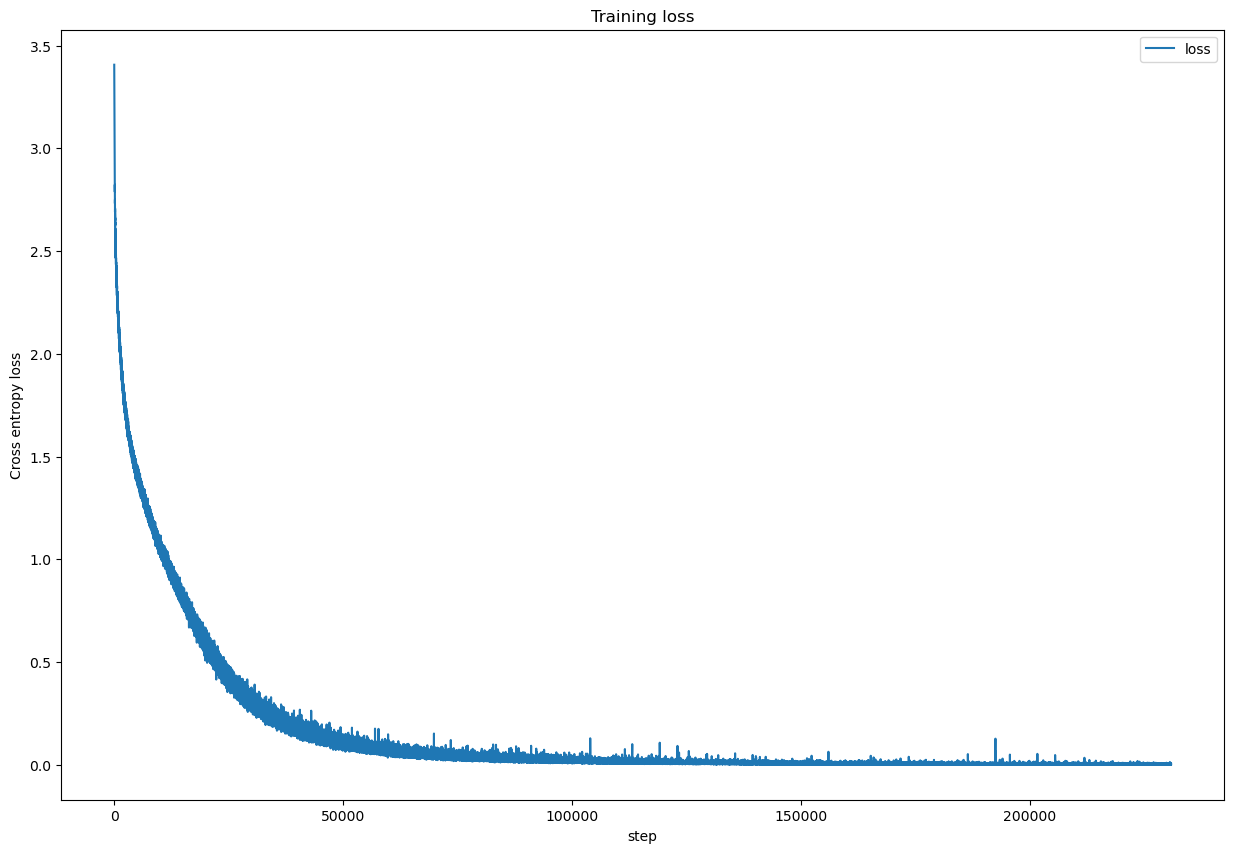

In [35]:
plt.figure(figsize=(15, 10))
plt.plot(new_df['step'], new_df['loss/train'], label ='loss')
plt.xlabel("step")
plt.ylabel("Cross entropy loss")
plt.legend()
plt.title("Training loss")
plt.savefig("../model_parallel_current/training_loss.png")